In [4]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

# LCDM parameters
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   # fixed LambdaCDM parameters
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'h':0.67556,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':3.0}  

# Matplotlib options
plt.rcParams["font.serif"] = ['Computer Modern']
plt.rcParams["text.usetex"] = True
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["axes.linewidth"] = 1.
plt.rcParams["font.size"] = 15.
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["figure.figsize"] = [14.0, 6.0]

# Consistency checks
We will first check that, with an extremely small coupling, we reproduce the neutrino effects on CMB and LSS

## Massless neutrinos

In [5]:
# Lambda CDM
LCDM = Class()
LCDM.set(common_settings)
LCDM.compute()

CMB_LCDM = LCDM.lensed_cl(2500)
ll_LCDM = CMB_LCDM['ell'][2:]
clTT_LCDM = CMB_LCDM['tt'][2:]

h = LCDM.h() # get reduced Hubble for conversions to 1/Mpc
kk = np.logspace(-4,np.log10(3),1000)
Pk_LCDM = np.array([LCDM.pk(k*h, 0.)*h**3 for k in kk]) # P(k) in (Mpc/h)**3 at zero redshift

# Our modification
lrs = Class()
lrs.set(common_settings)
lrs.set({'N_ur':0}) # Remove massless neutrinos
lrs.set({'lrs_m_F': 1e-7, # Mass of the sourcing fermion [eV]
         'lrs_g_over_M': 1e-6, # Coupling divided by the scalar mass [eV^-1]
         'lrs_g_F': 6, # Number of fermionic degrees of freedom
         'lrs_T_F': 0.716486, # Ratio among the fermionic and photon temperatures. This is (4/11)^1/3 * (N_eff/3)^1/4})
         'lrs_M_phi': 10, # Scalar mass [eV]
         'longrangescalar': 'y',
         'longrangescalar_pt' : 'no'
        })
lrs.compute()

CMB_lrs = lrs.lensed_cl(2500)
ll_lrs = CMB_lrs['ell'][2:]
clTT_lrs= CMB_lrs['tt'][2:]

h = lrs.h() # get reduced Hubble for conversions to 1/Mpc
Pk_lrs = np.array([lrs.pk(k*h, 0.)*h**3 for k in kk]) # P(k) in (Mpc/h)**3 at zero redshift

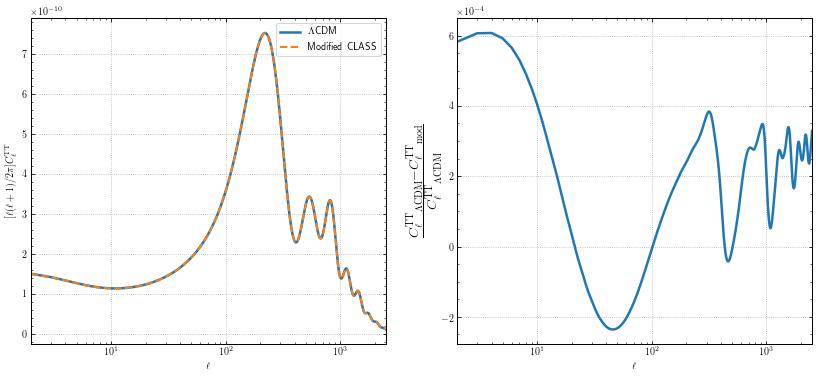

In [3]:
# Plot the CMB
plt.rcParams["figure.figsize"] = [14.0, 6.0]
plt.subplot(1, 2, 1)
plt.xscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll_LCDM,clTT_LCDM*ll_LCDM*(ll_LCDM+1)/2./np.pi, label=r"$\Lambda$CDM", linewidth=2.5)
plt.plot(ll_lrs,clTT_lrs*ll_lrs*(ll_lrs+1)/2./np.pi, linestyle="dashed", label="Modified CLASS", linewidth=2)
plt.legend()

plt.subplot(1, 2, 2)
plt.xscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r"$\frac{{C_\ell^\mathrm{TT}}_{\Lambda\mathrm{CDM}} - {C_\ell^\mathrm{TT}}_\mathrm{mod}}{{C_\ell^\mathrm{TT}}_{\Lambda\mathrm{CDM}}}$",
          labelpad=-5, fontsize=20)
plt.plot(ll_LCDM,(clTT_LCDM - clTT_lrs)/clTT_LCDM, 
         linewidth=2.5)
plt.ticklabel_format(axis="y", style="", scilimits=(0,0)) 

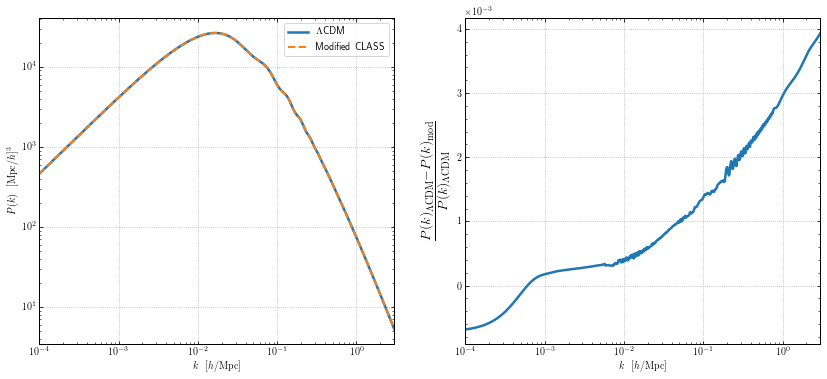

In [4]:
# Plot the power spectrum
plt.rcParams["figure.figsize"] = [14.0, 6.0]

plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk_LCDM, label=r"$\Lambda$CDM", linewidth=2.5)
plt.plot(kk,Pk_lrs, linestyle="dashed", label="Modified CLASS", linewidth=2)
plt.legend()

plt.subplot(1, 2, 2)
plt.xscale("log")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r"$\frac{P(k)_{\Lambda\mathrm{CDM}} - P(k)_\mathrm{mod}}{P(k)_{\Lambda\mathrm{CDM}}}$",
          fontsize=20)
plt.plot(kk,(Pk_LCDM - Pk_lrs)/Pk_LCDM, 
         linewidth=2.5)
plt.ticklabel_format(axis="y", style="", scilimits=(0,0));

## Massive neutrinos
To exagerate the effects, I will choose $m_\nu = 1 $ eV, the KATRIN limit.

In [8]:
# Lambda CDM
LCDM_mnu = Class()
LCDM_mnu.set(common_settings)
LCDM_mnu.set({'N_ur': 0, # No relativistic species
          'N_ncdm': 3, # Three massive neutrinos
          'm_ncdm': "1, 1, 1", # Masses of 1 eV
          'T_ncdm': "0.716486, 0.716486, 0.716486" # N_eff=3.046
         })
LCDM_mnu.compute()

CMB_LCDM_mnu = LCDM_mnu.lensed_cl(2500)
ll_LCDM_mnu = CMB_LCDM_mnu['ell'][2:]
clTT_LCDM_mnu = CMB_LCDM_mnu['tt'][2:]

h = LCDM_mnu.h() # get reduced Hubble for conversions to 1/Mpc
kk = np.logspace(-4,np.log10(3),1000)
Pk_LCDM_mnu = np.array([LCDM_mnu.pk(k*h, 0.)*h**3 for k in kk]) # P(k) in (Mpc/h)**3 at zero redshift

# Our modification
lrs_mnu = Class()
lrs_mnu.set(common_settings)
lrs_mnu.set({'N_ur':0}) # Remove massless neutrinos
lrs_mnu.set({'lrs_m_F': 1, # Mass of the sourcing fermion [eV]
         'lrs_g_over_M': 1e-6, # Coupling divided by the scalar mass [eV^-1]
         'lrs_g_F': 6, # Number of fermionic degrees of freedom
         'lrs_T_F': 0.716486, # Ratio among the fermionic and photon temperatures. This is (4/11)^1/3 * (N_eff/3)^1/4})
          'lrs_M_phi': 10, # Scalar mass [eV]
         'longrangescalar': 'y',
         'longrangescalar_pt' : 'no'
        })
lrs_mnu.compute()

CMB_lrs_mnu = lrs_mnu.lensed_cl(2500)
ll_lrs_mnu = CMB_lrs_mnu['ell'][2:]
clTT_lrs_mnu= CMB_lrs_mnu['tt'][2:]

h = lrs_mnu.h() # get reduced Hubble for conversions to 1/Mpc
Pk_lrs_mnu = np.array([lrs_mnu.pk(k*h, 0.)*h**3 for k in kk]) # P(k) in (Mpc/h)**3 at zero redshift

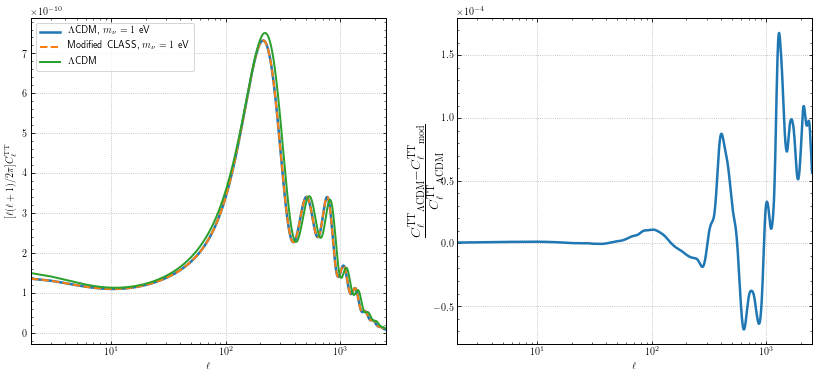

In [6]:
# Plot the CMB
plt.rcParams["figure.figsize"] = [14.0, 6.0]

plt.subplot(1, 2, 1)
plt.xscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll_LCDM_mnu,clTT_LCDM_mnu*ll_LCDM_mnu*(ll_LCDM_mnu+1)/2./np.pi, label=r"$\Lambda$CDM, $m_\nu=1$ eV", linewidth=2.5)
plt.plot(ll_lrs_mnu,clTT_lrs_mnu*ll_lrs_mnu*(ll_lrs_mnu+1)/2./np.pi, linestyle="dashed", label=r"Modified CLASS, $m_\nu=1$ eV", linewidth=2)
plt.plot(ll_LCDM,clTT_LCDM*ll_LCDM*(ll_LCDM+1)/2./np.pi, label=r"$\Lambda$CDM", linewidth=2)

plt.legend()

plt.subplot(1, 2, 2)
plt.xscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r"$\frac{{C_\ell^\mathrm{TT}}_{\Lambda\mathrm{CDM}} - {C_\ell^\mathrm{TT}}_\mathrm{mod}}{{C_\ell^\mathrm{TT}}_{\Lambda\mathrm{CDM}}}$",
          labelpad=-15, fontsize=20)
plt.plot(ll_LCDM_mnu,(clTT_LCDM_mnu - clTT_lrs_mnu)/clTT_LCDM_mnu, 
         linewidth=2.5)
plt.ticklabel_format(axis="y", style="", scilimits=(0,0)) 

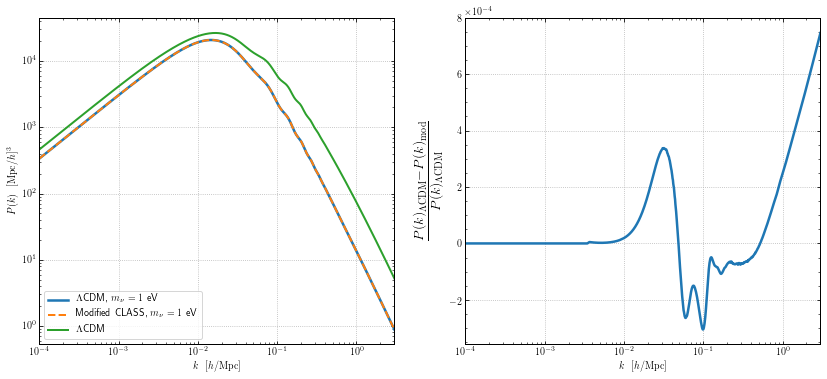

In [7]:
# Plot the power spectrum
plt.rcParams["figure.figsize"] = [14.0, 6.0]

plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk_LCDM_mnu, label=r"$\Lambda$CDM, $m_\nu=1$ eV", linewidth=2.5)
plt.plot(kk,Pk_lrs_mnu, linestyle="dashed", label=r"Modified CLASS, $m_\nu=1$ eV", linewidth=2)
plt.plot(kk,Pk_LCDM, label=r"$\Lambda$CDM", linewidth=2)
plt.legend()

plt.subplot(1, 2, 2)
plt.xscale("log")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r"$\frac{P(k)_{\Lambda\mathrm{CDM}} - P(k)_\mathrm{mod}}{P(k)_{\Lambda\mathrm{CDM}}}$",
          fontsize=20)
plt.plot(kk,(Pk_LCDM_mnu - Pk_lrs_mnu)/Pk_LCDM_mnu, 
         linewidth=2.5)
plt.ticklabel_format(axis="y", style="", scilimits=(0,0));

## Effect of the effective mass
Another consistency check is that, for a very large interaction coupling, neutrinos behave as massless.

In [6]:
# Our modification
lrs_2 = Class()
lrs_2.set(common_settings)
lrs_2.set({'N_ur':0}) # Remove massless neutrinos
lrs_2.set({'lrs_m_F': 1, # Mass of the sourcing fermion [eV]
         'lrs_g_over_M': 1e6, # Coupling divided by the scalar mass [eV^-1]
         'lrs_g_F': 6, # Number of fermionic degrees of freedom
         'lrs_T_F': 0.716486, # Ratio among the fermionic and photon temperatures. This is (4/11)^1/3 * (N_eff/3)^1/4})
         'lrs_M_phi': 0.01, # Scalar mass [eV]
         'longrangescalar': 'y',
         'longrangescalar_pt' : 'no'
        })
lrs_2.compute()

CMB_lrs_2 = lrs_2.lensed_cl(2500)
ll_lrs_2 = CMB_lrs_2['ell'][2:]
clTT_lrs_2= CMB_lrs_2['tt'][2:]

h = lrs_2.h() # get reduced Hubble for conversions to 1/Mpc
Pk_lrs_2 = np.array([lrs_2.pk(k*h, 0.)*h**3 for k in kk]) # P(k) in (Mpc/h)**3 at zero redshift

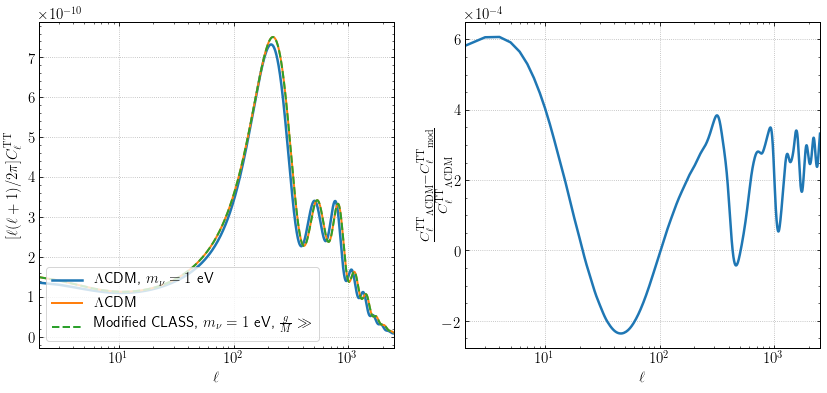

In [9]:
# Plot the CMB
plt.rcParams["figure.figsize"] = [14.0, 6.0]

plt.subplot(1, 2, 1)
plt.xscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll_LCDM_mnu,clTT_LCDM_mnu*ll_LCDM_mnu*(ll_LCDM_mnu+1)/2./np.pi, label=r"$\Lambda$CDM, $m_\nu=1$ eV", linewidth=2.5)
plt.plot(ll_LCDM,clTT_LCDM*ll_LCDM*(ll_LCDM+1)/2./np.pi, label=r"$\Lambda$CDM", linewidth=2)
plt.plot(ll_lrs_2,clTT_lrs_2*ll_lrs_2*(ll_lrs_2+1)/2./np.pi, linestyle="dashed", label=r"Modified CLASS, $m_\nu=1$ eV, $\frac{g}{M} \gg$", linewidth=2)


plt.legend()

plt.subplot(1, 2, 2)
plt.xscale("log")
plt.xlabel(r'$\ell$')
plt.ylabel(r"$\frac{{C_\ell^\mathrm{TT}}_{\Lambda\mathrm{CDM}} - {C_\ell^\mathrm{TT}}_\mathrm{mod}}{{C_\ell^\mathrm{TT}}_{\Lambda\mathrm{CDM}}}$",
          labelpad=-15, fontsize=20)
plt.plot(ll_LCDM,(clTT_LCDM - clTT_lrs_2)/clTT_LCDM, 
         linewidth=2.5)
plt.ticklabel_format(axis="y", style="", scilimits=(0,0)) 

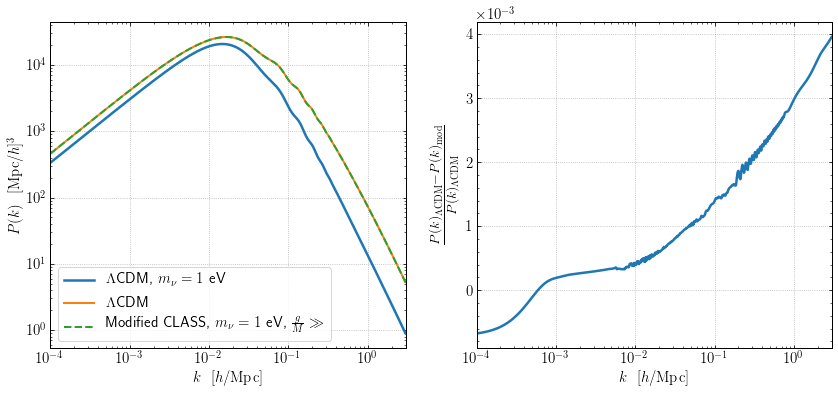

In [10]:
# Plot the power spectrum
plt.rcParams["figure.figsize"] = [14.0, 6.0]

plt.subplot(1, 2, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk_LCDM_mnu, label=r"$\Lambda$CDM, $m_\nu=1$ eV", linewidth=2.5)
plt.plot(kk,Pk_LCDM, label=r"$\Lambda$CDM", linewidth=2)
plt.plot(kk,Pk_lrs_2, linestyle="dashed", label=r"Modified CLASS, $m_\nu=1$ eV, $\frac{g}{M} \gg$", linewidth=2)
plt.legend()

plt.subplot(1, 2, 2)
plt.xscale("log")
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r"$\frac{P(k)_{\Lambda\mathrm{CDM}} - P(k)_\mathrm{mod}}{P(k)_{\Lambda\mathrm{CDM}}}$",
          fontsize=20)
plt.plot(kk,(Pk_LCDM - Pk_lrs_2)/Pk_LCDM, 
         linewidth=2.5)
plt.ticklabel_format(axis="y", style="", scilimits=(0,0));

## Background plots
We can also do some plots of the background quantities to compare with other numerical plots we have done.

In [11]:
# Declare parameters without perturbation flags to increase speed
common_settings_bkg = {
                    # fixed LambdaCDM parameters
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'h':0.67556,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925}  
lrs_bkg = Class()
lrs_bkg.set(common_settings_bkg)
lrs_bkg.set({'N_ur':0}); # Remove massless neutrinos

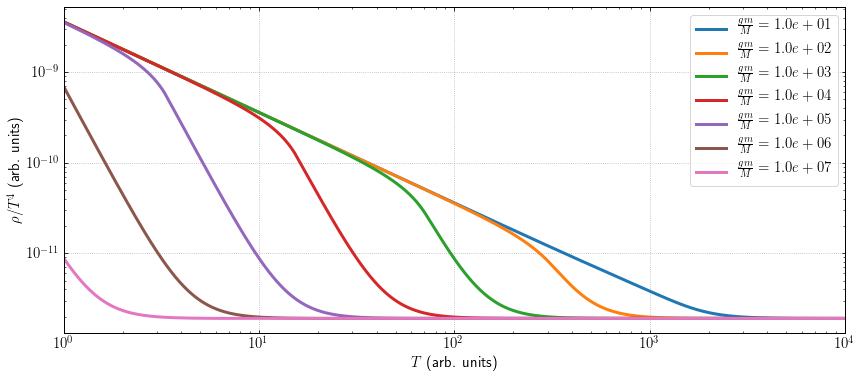

In [12]:
plt.ylabel(r"$\rho/T^4$ (arb. units)")
plt.xlabel(r"$T$ (arb. units)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1e4)
for g_over_M in np.geomspace(1e1, 1e7, 7):
    lrs_bkg.set({'lrs_m_F': 1, # Mass of the sourcing fermion [eV]
                 'lrs_g_over_M': g_over_M, # Coupling divided by the scalar mass [eV^-1]
                 'lrs_g_F': 6, # Number of fermionic degrees of freedom
                 'lrs_T_F': 0.716486, # Ratio among the fermionic and photon temperatures. This is (4/11)^1/3 * (N_eff/3)^1/4})
                         'lrs_M_phi': 0.01, # Scalar mass [eV]
         'longrangescalar': 'y',
         'longrangescalar_pt' : 'no'
                })
    lrs_bkg.compute()
    bkg = lrs_bkg.get_background()

    plt.plot(1+bkg['z'], bkg["(.)rho_lrs"]/(1+bkg['z'])**4, label=r"$\frac{g m}{M} = %.1e$" % g_over_M)
    
plt.legend();    

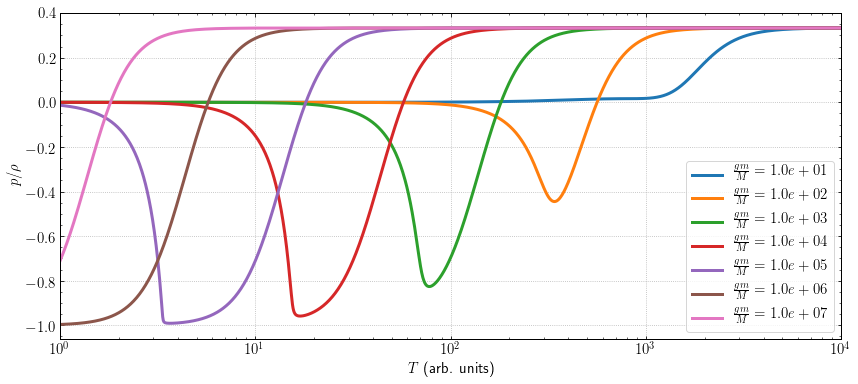

In [13]:
plt.ylabel(r"$p/\rho$")
plt.xlabel(r"$T$ (arb. units)")
plt.xscale("log")
plt.xlim(1, 1e4)
for g_over_M in np.geomspace(1e1, 1e7, 7):
    lrs_bkg.set({'lrs_m_F': 1, # Mass of the sourcing fermion [eV]
                 'lrs_g_over_M': g_over_M, # Coupling divided by the scalar mass [eV^-1]
                 'lrs_g_F': 6, # Number of fermionic degrees of freedom
                 'lrs_T_F': 0.716486 # Ratio among the fermionic and photon temperatures. This is (4/11)^1/3 * (N_eff/3)^1/4})
                })
    lrs_bkg.compute()
    bkg = lrs_bkg.get_background()

    plt.plot(1+bkg['z'], bkg["(.)p_lrs"]/bkg["(.)rho_lrs"], label=r"$\frac{g m}{M} = %.1e$" % g_over_M)
    
plt.legend();    

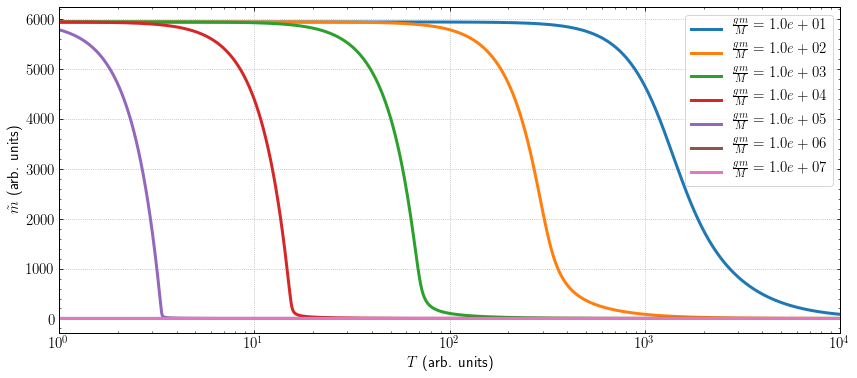

In [14]:
plt.ylabel(r"$\tilde{m}$ (arb. units)")
plt.xlabel(r"$T$ (arb. units)")
plt.xscale("log")
plt.xlim(1, 1e4)
for g_over_M in np.geomspace(1e1, 1e7, 7):
    lrs_bkg.set({'lrs_m_F': 1, # Mass of the sourcing fermion [eV]
                 'lrs_g_over_M': g_over_M, # Coupling divided by the scalar mass [eV^-1]
                 'lrs_g_F': 6, # Number of fermionic degrees of freedom
                 'lrs_T_F': 0.716486 # Ratio among the fermionic and photon temperatures. This is (4/11)^1/3 * (N_eff/3)^1/4})
                })
    lrs_bkg.compute()
    bkg = lrs_bkg.get_background()

    plt.plot(1+bkg['z'], bkg["(.)mT_over_T0_lrs"], label=r"$\frac{g m}{M} = %.1e$" % g_over_M)
    
plt.legend();   